<a href="https://colab.research.google.com/github/GabrielArruda01/JPMorganVIXStrategy/blob/main/JPmorganStrat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

In [2]:
vix_df = yf.download('^VIX')

[*********************100%%**********************]  1 of 1 completed


In [3]:
vix_df['MA'] = vix_df.Close.rolling('30D').mean()

In [5]:
vix_df

,Open,High,Low,Close,Adj Close,Volume,MA
Date,,,,,,,
1990-01-02,17.240000,17.240000,17.240000,17.240000,17.240000,0,17.240000
1990-01-03,18.190001,18.190001,18.190001,18.190001,18.190001,0,17.715000
1990-01-04,19.219999,19.219999,19.219999,19.219999,19.219999,0,18.216667
1990-01-05,20.110001,20.110001,20.110001,20.110001,20.110001,0,18.690000
1990-01-08,20.260000,20.260000,20.260000,20.260000,20.260000,0,19.004000
...,...,...,...,...,...,...,...
2023-12-29,12.550000,13.190000,12.360000,12.450000,12.450000,0,12.728095
2024-01-02,13.220000,14.230000,13.100000,13.200000,13.200000,0,12.747000
2024-01-03,13.350000,14.220000,13.330000,14.040000,14.040000,0,12.795000


In [6]:
vix_df_filtered = vix_df[vix_df.Close > 1.5* vix_df.MA]

In [7]:
vix_df_filtered

,Open,High,Low,Close,Adj Close,Volume,MA
Date,,,,,,,
1990-08-06,35.910000,35.910000,35.910000,35.910000,35.910000,0,20.330476
1990-08-07,32.750000,32.750000,32.750000,32.750000,32.750000,0,20.895000
1994-04-04,23.610001,28.299999,23.610001,23.870001,23.870001,0,15.487000
1997-10-30,36.709999,38.560001,35.840000,38.200001,38.200001,0,23.360909
2001-09-17,43.200001,44.330002,39.770000,41.759998,41.759998,0,25.810625
...,...,...,...,...,...,...,...
2020-03-19,80.620003,84.260002,68.570000,72.000000,72.000000,0,44.842273
2021-01-27,23.820000,37.209999,23.709999,37.209999,37.209999,0,23.929500
2021-11-26,26.620001,28.990000,23.879999,28.620001,28.620001,0,17.673810


In [8]:
series = pd.Series(vix_df_filtered.index).diff() / np.timedelta64(1, 'D') >=30

In [10]:
series[0] = True

In [11]:
signals = vix_df_filtered[series.values]

In [12]:
sp500_df = yf.download('^GSPC', start = '1990-01-01')

[*********************100%%**********************]  1 of 1 completed


In [13]:
from pandas.tseries.offsets import DateOffset

In [14]:
returns = []

for i in range(len(signals)):
    subdf = sp500_df[(sp500_df.index >= signals.index[i]) &
                     (sp500_df.index <= signals.index[i] + DateOffset(months=6))]
    returns.append((subdf.Close.pct_change()+1).prod())

In [15]:
pd.Series(returns) -1

0     0.070687
1     0.035701
2     0.230247
3     0.122635
4     0.048426
5    -0.327113
6     0.086602
7     0.120685
8     0.116117
9     0.062629
10   -0.026947
11    0.111112
12    0.074374
13    0.072259
14    0.036806
15    0.252754
16    0.172230
17    0.063669
18    0.173482
19   -0.116828
20   -0.089433
dtype: float64

<Axes: >

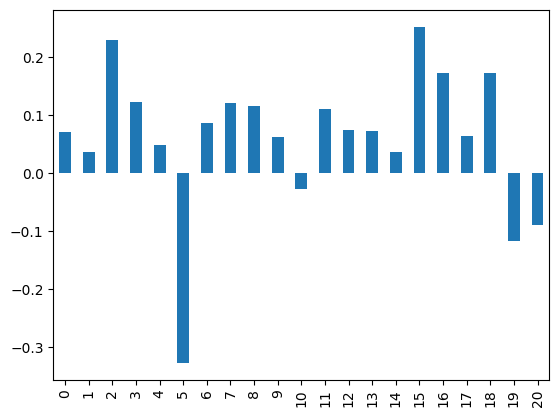

In [16]:
(pd.Series(returns)-1).plot(kind='bar')